@author: Octavio Gutiérrez de Código Máquina

URL del canal: https://www.youtube.com/CodigoMaquina

URL del video: https://youtu.be/2FbugqoBz94


<br><br>
<img src="imagenes/clases_desbalanceadas.png" width="500" align="left" style="display:block">
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<h1 style="color:purple">Librerías y Código de Soporte</h1>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 


def matriz_de_confusion(clases_reales, clases_predichas, titulo):
    """ Visualiza la matriz de confusión """
   
    matriz = confusion_matrix(clases_reales, clases_predichas)
    accuracy = accuracy_score(clases_reales, clases_predichas)
    
    #Código de matplotlib para graficar 
    plt.figure(figsize=(4, 4))
    matriz = pd.DataFrame(matriz, 
                          columns=["0 : Sano", "1 : Cáncer"])
    plt.matshow(matriz, cmap="summer", vmin=0, vmax=20, fignum=1)
    plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=45)
    plt.yticks(range(len(matriz.columns)), matriz.columns)
    etiquetas = (("Verdaderos\nnegativos", "Falsos\npositivos"),
                 ("Falsos\nnegativos", "Verdaderos\npositivos"))
    plt.text(1.60, -0.30, titulo, fontsize=25, c="red")
    plt.text(2.1, 0.10, "Accuracy: %0.2f" % accuracy, fontsize=20)
    for i in range(len(matriz.columns)):
        for j in range(len(matriz.columns)):
            plt.text(i, j + 0.14, str(matriz.iloc[i, j]),
                     fontsize=30, ha="center", va="center")
            plt.text(i, j - 0.25, etiquetas[i][j],
                     fontsize=11.5, ha="center", va="center")           
    plt.show()





<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<h1 style="color:purple">Datos de Cáncer de Mama</h1>
<h2 style="color:purple">Distribución de Clases (Desbalanceadas)</h2>

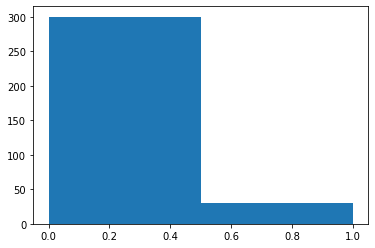

In [2]:
# University of Wisconsin, Clinical Sciences Center 
info = np.loadtxt("cancer.csv", delimiter=",", unpack=True)

# 30 características: radio, textura, area, entre otros
datos = info[:-1].T

# 0 : SANO, 1 : CÁNCER
clase = info[-1]

plt.hist(clase, bins=2)
plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<h1 style="color:purple"> Clasificador Regresión Logística</h1>
<h2 style="color:purple"> Asignación de Pesos a Clases</h2>

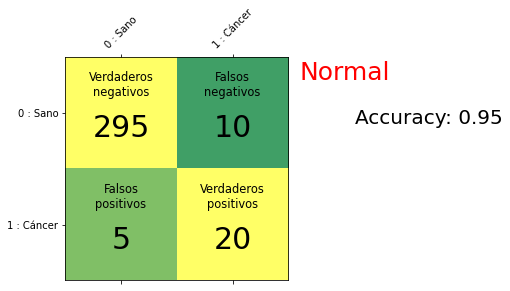

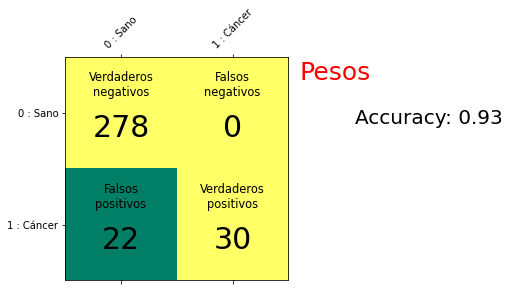

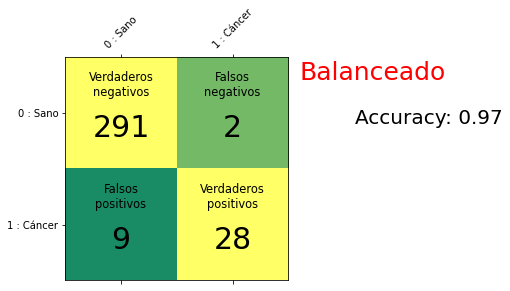

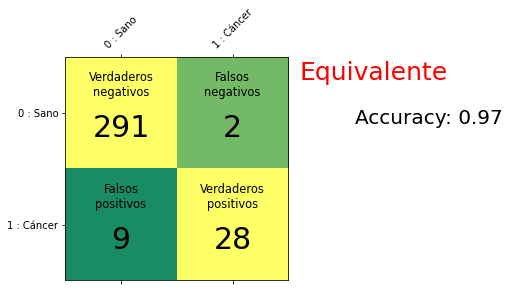

0.55 5.5


In [3]:
modelo = LogisticRegression().fit(datos, clase)
matriz_de_confusion(clase, modelo.predict(datos), "Normal") 

modelo = LogisticRegression(class_weight={0 : 1, 1 : 100}).fit(datos, clase)
matriz_de_confusion(clase, modelo.predict(datos), "Pesos") 

modelo = LogisticRegression(class_weight="balanced").fit(datos, clase)
matriz_de_confusion(clase, modelo.predict(datos), "Balanceado") 

modelo = LogisticRegression(class_weight={0 : 0.55, 1 : 5.5}).fit(datos, clase)
matriz_de_confusion(clase, modelo.predict(datos), "Equivalente") 

print(330 / (2 * 300), 330 / (2 * 30))


